# Lab 6 Control theory, B03-04

#**Important information**
> **LAB Assignment** \
**Tasks for lab assignment 3:** ...\
**Deadline for lab assignment 3:** ....\
**File name for assignment submission:** `yourname_group.ipynb` (example: `IvanovIvan_B03.ipynb`) 

>**FEEDBACK** \
Feedback form is available by the [link](https://docs.google.com/forms/d/1Q8dyBbCRiY-oy9jY2ujxd2y8EBxlULzXsXOVghTeHiQ/edit).
You are welcome to ask a questions about the practice sessions here.

# **Observers**


Recall the structure of the all previously derived controllers:
\begin{equation}
\begin{cases}
\dot {\mathbf{x}} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}\\
\mathbf{u} = \mathbf{K} \mathbf{x}
\end{cases}
\end{equation}

You may see that control is function of system state $\mathbf{x}$, we call such controllers **full-state** feedback.

However, in most practical cases, the physical state of the system cannot be determined by direct observation. Instead, indirect effects of the internal state are observed by way of the system outputs. 

A simple example is that of vehicles in a tunnel: the rates and velocities at which vehicles enter and leave the tunnel can be observed directly, but the exact state inside the tunnel can only be estimated. If a system is observable, it is possible to fully reconstruct the system state from its output measurements using the state observer.

In many cases the outputs $\mathbf{y} \in \mathbb{R}^{q}$ are given as linear function of states:
\begin{equation}
  \mathbf{y} = \mathbf{C}\mathbf{x}
\end{equation}

where $\mathbf{C}\in \mathbb{R}^{q \times n}$ is so called output matrix. 

Thus the overall system from input $\mathbf{u}$ to output $\mathbf{y}$ is represented as follows:
\begin{equation}
\begin{cases}
\dot {\mathbf{x}} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}
\\
\mathbf{y} = \mathbf{C}\mathbf{x}
\end{cases}
\end{equation}


And our goal is to deduce the internal **state** $\mathbf{x}$ by means of **estimates** $\hat{\mathbf{x}}$ using the measurements of **output** $\mathbf{y}$ and knowledge of the system dynamics. To do so we introduce the new system, namely **observer**, which provides the estimate of **states** based on the system output

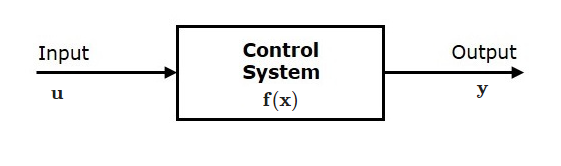

## **Observer design**

Let us consider autonomous dynamical system
$$
\begin{cases}
\dot {\mathbf{x}} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u} \\
\mathbf{y} = \mathbf{C} \mathbf{x}
\end{cases}
$$

with measurements $\mathbf{y}$. We want to get as good an estimate of the state $\hat{\mathbf{x}}$ as we can.

Dynamics should also hold for our observed state:
\begin{equation}
\hat{\dot {\mathbf{x}}} = \mathbf{A} \hat{\mathbf{x}} + \mathbf{B} \mathbf{u}
\end{equation}

Therefore if we know the initial conditions of our system exactly, and we know our model exactly, we can find exact state of the system without using measurement $\mathbf{y}$. We can call it an open loop observation. Unfortunately, we know neither the model nor the initial conditions precisely.

We propose an *observer* that takes into account the measurement in a linear way
$$
\hat{\dot {\mathbf{x}}} = \mathbf{A} \hat{\mathbf{x}} + \mathbf{B} \mathbf u + \mathbf{L}(\mathbf y - \mathbf{C} \hat{\mathbf{x}})
$$

with measurements $\mathbf{y}$. With this observer, we want to get as good estimate of the state $\hat{\mathbf{x}}$ as we can.

Let's define state estimation error as $\varepsilon = \hat{\mathbf{x}} - \mathbf{x}$:

$$
\hat{\dot {\mathbf{x}}} - \dot {\mathbf{x}}= 
\mathbf{A} \hat{\mathbf{x}} - \mathbf{A} \mathbf{x} + 
\mathbf{L}(\mathbf y - \mathbf{C} \hat{\mathbf{x}})
$$

\begin{equation}
\dot {\varepsilon}= 
(\mathbf{A} - \mathbf{L} \mathbf{C}) \varepsilon
\end{equation}

 $\dot {\varepsilon}= 
(\mathbf{A} - \mathbf{L} \mathbf{C}) \varepsilon$ is **stable** (i.e., the state estimation error tends to zero), as long as the following matrix has eigenvalues with negative real parts.

* Controller design: find $\mathbf{K}$ that $\mathbf{A - BK<0}$
* Observer design: find $\mathbf{L}$ that $\mathbf{A - LC <0}$


In general, we can observe that if $\mathbf{A} - \mathbf{L} \mathbf{C}$ is negative-definite, then $(\mathbf{A} - 
\mathbf{L} \mathbf{C})^{\top}$ is negative-definite too (by definition of the negative-definiteness). 

This mean that we can define $\mathbf{L}$ by the pole placement or LQR.



In [ ]:
from scipy.signal import place_poles

A = np.array([[0, 20],
              [1,  0]])
B = np.array([[0],
              [1]])
C = np.array([[0, 1]])

poles = [-1,-2]
P_pp = place_poles(np.transpose(A), np.transpose(C), poles)

L_T = P_pp.gain_matrix
L = np.transpose(L_T)
print("L:\n",L)

L:
 [[22.]
 [ 3.]]


In [ ]:
from scipy.linalg import solve_continuous_are

Q = np.array([[1, 0],
              [0,  2]])
R = np.array([[1]])

P_lqr = solve_continuous_are(np.transpose(A),np.transpose(C),Q,R)
print("P:\n",P_lqr)

L_T = np.dot(np.dot(np.linalg.inv(R), np.transpose(B)),P_lqr)
L = np.transpose(L_T)
print("L:\n",L)

P:
 [[181.38918789  40.02498439]
 [ 40.02498439   9.05814378]]
L:
 [[40.02498439]
 [ 9.05814378]]


## **Exercises**


1. $
\begin{cases}
\dot {\mathbf{x}} = \begin{bmatrix} 0 & 8 \\ 1 & 3
\end{bmatrix} \mathbf{x} + \begin{bmatrix}1\\2
\end{bmatrix} \mathbf{u} \\
\mathbf{y} = \begin{bmatrix}2 & 0
\end{bmatrix} \mathbf{x}
\end{cases}
$

2. $
\begin{cases}
\dot {\mathbf{x}} = \begin{bmatrix} 0 & 8 \\ 6 & 0
\end{bmatrix} \mathbf{x} + \begin{bmatrix}1\\0
\end{bmatrix} \mathbf{u} \\
\mathbf{y} = \begin{bmatrix}1 & 0
\end{bmatrix} \mathbf{x}
\end{cases}
$

3. $
\begin{cases}
\dot {\mathbf{x}} = \begin{bmatrix} 0 & 1 \\ -3 & 0
\end{bmatrix} \mathbf{x} + \begin{bmatrix}1\\2
\end{bmatrix} \mathbf{u} \\
\mathbf{y} = \begin{bmatrix}1 & 0\\ 1 & 2
\end{bmatrix} \mathbf{x}
\end{cases}
$

4. $
\begin{cases}
\dot {\mathbf{x}} = \begin{bmatrix} 1 & -2 \\ 1 & 0
\end{bmatrix} \mathbf{x} + \begin{bmatrix}1\\0
\end{bmatrix} \mathbf{u} \\
\mathbf{y} = \begin{bmatrix}0 & 1\\ 2 & 0
\end{bmatrix} \mathbf{x}
\end{cases}
$

In [ ]:
A = np.array([[ 0, 8],
              [6,  0]])
B = np.array([[1],
              [0]])
C = np.array([[1, 0]])

poles = [-1,-2]
K = place_poles(A, B, poles).gain_matrix
print("K:\n",K)

P_pp = place_poles(np.transpose(A), np.transpose(C), poles)
L_T = P_pp.gain_matrix
L = np.transpose(L_T)
print("L:\n",L)

K:
 [[3.         8.33333333]]
L:
 [[3.  ]
 [6.25]]


## **Observation and control**


Dynamics for our system is following:

\begin{equation}
\begin{cases}
\dot {\mathbf{x}} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u} \\
\hat{\dot {\mathbf{x}}} = \mathbf{A} \hat{\mathbf{x}} + \mathbf{B} \mathbf u + \mathbf{L}(\mathbf y - \mathbf{C} \hat{\mathbf{x}})\\
\mathbf{y} = \mathbf{C} \mathbf{x} \\
\mathbf{u} = -\mathbf{K} (\hat{\mathbf{x}} - \mathbf{x}^*(t)) + \mathbf{u}^*(t)
\end{cases}
\end{equation}

where $\mathbf{A} - \mathbf{B} \mathbf{K} < 0$ and $\mathbf{A}^{\top} - 
\mathbf{C}^{\top} \mathbf{L}^{\top} < 0$.

Let us use the following substitution: $\mathbf{e} = \mathbf{x} - \hat{\mathbf{x}}$, which implies $\hat{\mathbf{x}} = \mathbf{x} - \mathbf{e}$:

Our system had form:

\begin{equation}
\begin{cases}
\dot {\mathbf{x}} = \mathbf{A} \mathbf{x} - \mathbf{B}\mathbf{K} \hat{\mathbf{x}} \\
\hat{\dot {\mathbf{x}}} = \mathbf{A} \hat{\mathbf{x}} - \mathbf{B}\mathbf{K} \hat{\mathbf{x}} + \mathbf{L}(\mathbf{C} \mathbf{x} - \mathbf{C} \hat{\mathbf{x}})
\end{cases}
\end{equation}

Since $\dot{\mathbf{e}} = \dot{\mathbf{x}} - \hat{\dot{\mathbf{x}}}$, we get:
$$
\dot{\mathbf{e}} = 
\mathbf{A} \mathbf{x} - \mathbf{B}\mathbf{K} \hat{\mathbf{x}} - 
(\mathbf{A} \hat{\mathbf{x}} - \mathbf{B}\mathbf{K} \hat{\mathbf{x}} + \mathbf{L}(\mathbf{C} \mathbf{x} - \mathbf{C} \hat{\mathbf{x}}))
$$
$$
\dot{\mathbf{e}} = 
\mathbf{A} (\mathbf{x} - \hat{\mathbf{x}})  - \mathbf{L}\mathbf{C}(\mathbf{x} - \hat{\mathbf{x}})
$$

$$
\dot{\mathbf{e}} = 
(\mathbf{A}  - \mathbf{L}\mathbf{C})\mathbf{e}
$$

Equation for $\dot {\mathbf{x}}$ takes form:

$$
\dot {\mathbf{x}} = (\mathbf{A}-\mathbf{B}\mathbf{K}) \mathbf{x} +  \mathbf{B}\mathbf{K}\mathbf{e}
$$

In matrix form this equations is:
\begin{equation}
\begin{bmatrix}
\dot {\mathbf{x}} \\
\dot{\mathbf{e}}
\end{bmatrix}
=
\begin{bmatrix}
(\mathbf{A}-\mathbf{B}\mathbf{K}) & \mathbf{B}\mathbf{K} \\
0 & (\mathbf{A}  - \mathbf{L}\mathbf{C})
\end{bmatrix}
\begin{bmatrix}
\mathbf{x} \\
\mathbf{e}
\end{bmatrix}
\end{equation}

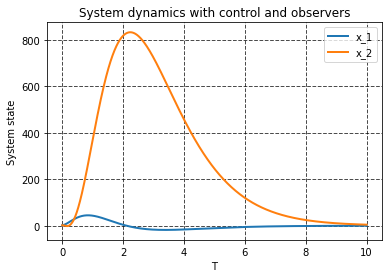

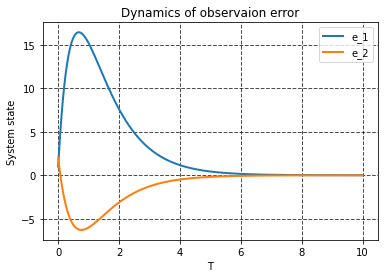

In [ ]:
def observers_ode(xe, t, A, B, C, K, L):
  A_obs_1 = np.concatenate((A-np.dot(B,K),np.dot(B,K)),axis=1)
  A_obs_2 = np.concatenate((np.zeros(A.shape),A-np.dot(L,C)),axis=1)
  A_obs = np.concatenate((A_obs_1, A_obs_2),axis=0)

  dxde = np.dot(A_obs,xe)

  return dxde

t0 = 0 # Initial time 
tf = 10 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span

A = np.array([[ 10, 5],
              [-5,  -10]])
B = np.array([[-1],
              [2]])
C = np.array([[0, 1]])

poles = [-1,-2]
K = place_poles(A, B, poles).gain_matrix

P_pp = place_poles(np.transpose(A), np.transpose(C), poles)
L_T = P_pp.gain_matrix
L = np.transpose(L_T)

x0 = np.array([2, 2])
e0 = np.array([1, 2])

xe0 = np.concatenate((x0,e0),axis=0)

x_sol = odeint(observers_ode, xe0, t, args=(A, B, C, K, L))
plot_results(t,x_sol[:,:2],x_label="T",y_label="System state",plot_title="System dynamics with control and observers",labels=['x_1','x_2'],xlim=None, ylim=None)
plot_results(t,x_sol[:,2:],x_label="T",y_label="System state",plot_title="Dynamics of observaion error",labels=['e_1','e_2'],xlim=None, ylim=None)

# **Controllability and Observalibity**

Controllability and observability represent two major concepts of modern control system theory. These concepts were introduced by R. Kalman in 1960. They can be roughly defined as follows.
* Controllability: In order to be able to do whatever we want with the given
dynamic system under control input, the system must be controllable.
* Observability: In order to see what is going on inside the system under observation, the system must be observable


**Controllability** is an important property of a control system, and the controllability property plays a crucial role in many control problems, such as stabilization of unstable systems by feedback, or optimal control.

* Roughly, the concept of controllability denotes the **ability to move a system around in its entire configuration space using only certain admissible manipulations**. The exact definition varies slightly within the framework or the type of models applied.
We can informally define controllability as follows:

* If for some initial state $\mathbf {x_{0}}$  and some final state $\mathbf {x_{f}}$ there exists an input sequence to transfer the system state from $\mathbf {x_{0}}$  to $\mathbf {x_{f}}$ in a finite time interval, then the system modeled by the state-space representation is controllable.



**Observability** is a notion that plays a major role in filtering and reconstruction of states from inputs and outputs. Together with reachability, observability is central to the understanding of feedback control systems.

* It turns out it is more natural to think in terms of **unobservability** as refected in the following defnition

* A state q of a fnite dimensional dynamic system is said to be unobservable over $[0 T]$
if, with $x(0) = q$ and for every $u(t)$ over $[0 T]$, we get the same $y(t)$ as we would with $x(0) = 0$, i.e.
an unobservable initial condition cannot be distinguished from the zero initial condition. 

* The dynamic system is called unobservable if it has an unobservable state, and otherwise it is called observable. The initial state $x(0)$ can be uniquely determined from input/output measurements if the system
is observable. 

### **Full State Controlability and Observability**
Consider the discrete or continues time systems:
\begin{equation}
\dot{\mathbf{x}}
=
\mathbf{A}\mathbf{x}
+ 
\mathbf{B}\mathbf{u}
\\
\mathbf{y} = \mathbf{C} \mathbf{x}\\
\end{equation}

\begin{equation}
\mathbf{x}_{k+1}
=
\mathbf{A}_d\mathbf{x}_k
+ 
\mathbf{B}_d\mathbf{u}_k
\\
\mathbf{y}_k = \mathbf{C} \mathbf{x}_k\\
\end{equation}

The $n\times nm$ controllability matrix is given by

\begin{equation}
\mathcal{\mathbf{R}}=
{\begin{bmatrix}
\mathbf{B}&
\mathbf{AB}&
\mathbf{A^{{2}}B}&
...&
\mathbf{A^{{n-1}}B}
\end{bmatrix}}
\end{equation}
The system is **full state controllable** iff the controllability matrix has full row rank:
\begin{equation}
\text{rank}\{\mathcal{\mathbf{R}}\}
=n
\end{equation}

The $r n \times n$ controllability matrix is given by

\begin{equation}
\mathcal{\mathbf{O}}=
{\begin{bmatrix}
\mathbf{C}\\
\mathbf{CA}\\
\mathbf{CA^{{2}}}\\
...\\
\mathbf{CA^{{n-1}}}
\end{bmatrix}}
\end{equation}

The system is **full state observable** iff the observability matrix has full row rank:
\begin{equation}
\text{rank}\{\mathcal{\mathbf{O}}\}
=n
\end{equation}


## **Exercice:** Implement the code to test the controllability and observability of a given system

## **Solution:**

In [ ]:
import numpy as np

def ctrb(A, B):
  R = B
  n = np.shape(A)[0]
  # print(n)
  for i in range(1,n):
    A_pwr_n = np.linalg.matrix_power(A, i) 
    R = np.hstack((R, A_pwr_n.dot(B)))
  rank = np.linalg.matrix_rank(R)
  
  if rank == n:
    test = 'controllable'
  else:
    test = 'uncontrollable'
  return R, rank, test



def obs(A, C):
  O = C
  n = np.shape(A)[0]

  for i in range(1,n):
    A_pwr_n = np.linalg.matrix_power(A, i) 
    O = np.vstack((O, C.dot(A_pwr_n)))
  rank = np.linalg.matrix_rank(O)
  
  if rank == n:
    test = 'observable'
  else:
    test = 'unobservable'
  return O, rank, test


A = np.array(
    [[0,1],
    [-2,-3]]
)

B = np.array(
    [[0],
    [1]]
)

C = np.array(
    [1,0]
)
     

R, rank_c, test_c = ctrb(A, B)
O, rank_o, test_o = obs(A, C)
print(f'Contralability matrix:\n{R}\n\nRank of the controlability matrix: {rank_c},\nsystem is {test_c}' )
print(f'Observability matrix:\n{O}\n\nRank of the observability matrix: {rank_o},\nsystem is {test_o}' )

Contralability matrix:
[[ 0  1]
 [ 1 -3]]

Rank of the controlability matrix: 2,
system is controllable
Observability matrix:
[[1 0]
 [0 1]]

Rank of the observability matrix: 2,
system is observable
